Importing the required libraries for the project.

In [1]:
!git clone https://github.com/SaiRamChagantiUMKC/Train
!ls Train
!pip3 install imgaug
import os # importing os for creating and removing a directory (folder), fetching its contents etc..
import numpy as np # importing numpy for mathametical operations
import matplotlib.pyplot as plt # plotting figures
import matplotlib.image as mpimg # loading, rescaling and displaying image
import keras # developing and evaluating deep learning models
from keras.models import Sequential # groups a linear stack of layers into a tf.
from tensorflow.keras.optimizers import Adam #optimization algorithm for training deep learning models. 
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense # different layers in CNN 
from sklearn.utils import shuffle # Shuffle arrays or sparse matrices in a consistent way.
from sklearn.model_selection import train_test_split # for splitting data into training and testing data
from imgaug import augmenters as iaa # image augmentation (altering the existing data to create some more data for the model training)
import cv2 # processing images and videos to identify objects, faces etc 
import pandas as pd # used for data science/data analysis and machine learning tasks.
import ntpath # handlING Windows paths on other platforms.
import random # picking a random number in a given range.

Cloning into 'Train'...
remote: Enumerating objects: 12220, done.
remote: Total 12220 (delta 0), reused 0 (delta 0), pack-reused 12220
Receiving objects: 100% (12220/12220), 178.88 MiB | 11.65 MiB/s, done.
Checking out files: 100% (12295/12295), done.
driving_log.csv  IMG


 Reading the csv file the path (joied with directory and csv file) , assigning the column names to the data and reading top elemnts of the data.



In [2]:
datadirectory = 'Train' # directory of the data
cols = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed'] #  names of the columns
data = pd.read_csv(os.path.join(datadirectory, 'driving_log.csv'), names = cols) # reading csv and assigning names to the columns
pd.set_option('display.max_colwidth', -1)# displaying the total width of columns of dataframe.
data.head() # reading top 5 rows of data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


center  \
0  C:\SelfDrive\Simulator\TrainingData\IMG\center_2022_04_28_21_44_38_557.jpg   
1  C:\SelfDrive\Simulator\TrainingData\IMG\center_2022_04_28_21_44_38_707.jpg   
2  C:\SelfDrive\Simulator\TrainingData\IMG\center_2022_04_28_21_44_38_815.jpg   
3  C:\SelfDrive\Simulator\TrainingData\IMG\center_2022_04_28_21_44_38_962.jpg   
4  C:\SelfDrive\Simulator\TrainingData\IMG\center_2022_04_28_21_44_39_066.jpg   

                                                                        left  \
0   C:\SelfDrive\Simulator\TrainingData\IMG\left_2022_04_28_21_44_38_557.jpg   
1   C:\SelfDrive\Simulator\TrainingData\IMG\left_2022_04_28_21_44_38_707.jpg   
2   C:\SelfDrive\Simulator\TrainingData\IMG\left_2022_04_28_21_44_38_815.jpg   
3   C:\SelfDrive\Simulator\TrainingData\IMG\left_2022_04_28_21_44_38_962.jpg   
4   C:\SelfDrive\Simulator\TrainingData\IMG\left_2022_04_28_21_44_39_066.jpg   

                                                                        right  \
0   C:\SelfDrive\Simulator\TrainingData\IMG\right_2022_04_28_21_44_38_557.jpg   
1   C:\SelfDrive\Simulator\TrainingData\IMG\right_2022_04_28_21_44_38_707.jpg   
2   C:\SelfDrive\Simulator\TrainingData\IMG\right_2022_04_28_21_44_38_815.jpg   
3   C:\SelfDrive\Simulator\TrainingData\IMG\right_2022_04_28_21_44_38_962.jpg   
4   C:\SelfDrive\Simulator\TrainingData\IMG\right_2022_04_28_21_44_39_066.jpg   

   steering  throttle  reverse     speed  
0  0.0       0.0       0        0.000078  
1  0.0       0.0       0        0.000078  
2  0.0       0.0       0        0.000078  
3  0.0       0.0       0        0.000078  
4  0.0       0.0       0        0.000079

Getting the tail part of center , left and right columns by splitiing the data using ntpath

In [3]:
#function to split the data in the column to head and tail  and return only tail
def path_tail(path):
  head, tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_tail) #  retrieving the tail from center column
data['left'] = data['left'].apply(path_tail) #  retrieving the tail from left column
data['right'] = data['right'].apply(path_tail) #  retrieving the tail from right column
data.head()

center                              left  \
0  center_2022_04_28_21_44_38_557.jpg  left_2022_04_28_21_44_38_557.jpg   
1  center_2022_04_28_21_44_38_707.jpg  left_2022_04_28_21_44_38_707.jpg   
2  center_2022_04_28_21_44_38_815.jpg  left_2022_04_28_21_44_38_815.jpg   
3  center_2022_04_28_21_44_38_962.jpg  left_2022_04_28_21_44_38_962.jpg   
4  center_2022_04_28_21_44_39_066.jpg  left_2022_04_28_21_44_39_066.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2022_04_28_21_44_38_557.jpg  0.0       0.0       0        0.000078  
1  right_2022_04_28_21_44_38_707.jpg  0.0       0.0       0        0.000078  
2  right_2022_04_28_21_44_38_815.jpg  0.0       0.0       0        0.000078  
3  right_2022_04_28_21_44_38_962.jpg  0.0       0.0       0        0.000078  
4  right_2022_04_28_21_44_39_066.jpg  0.0       0.0       0        0.000079

Plot steering angles to visualise the distribution, we can see which Steering angle is frequency throughout the distribution. We will divide the entire range of intervals called as bins. We took 25 as odd number to get centre value. To get centre value as zero, performing elementwise addition between the two segments, and multipled with 0.5 to restore appropriate range.

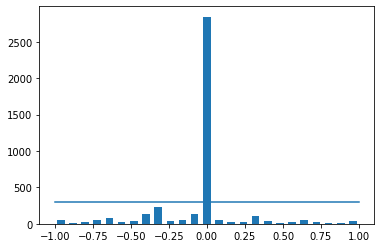

In [4]:
number_of_bins = 25 # number of bins
samples_per_each_bin = 300 # threshold for number of bins
hist, bins = np.histogram(data['steering'], number_of_bins) # plotting histogram for streeing angles to visualize the distribution
center = (bins[:-1]+ bins[1:]) * 0.5 # element wise additon to get 0 as centre value and diving by 0.5 to divide the values doubled.
plt.bar(center, hist, width=0.05) #plotting the histogram with center values 
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_each_bin, samples_per_each_bin))# plotting

As we can see lot of steering angles at 0(always makes straight driving), to make data more biased, we need to remove those values by setting some threshold limit (samples_per_each_bin)

total data samples: 4098
removed samples: 2546
remaining samples: 1552


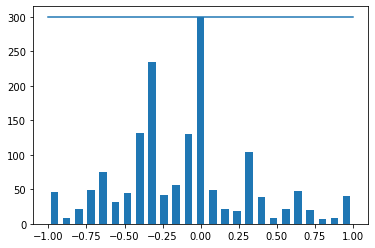

In [5]:
print('total data samples:', len(data))
remove_unwanted_list = []
for j in range(number_of_bins):
  data_list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      data_list_.append(i) #all the Steering angles belong to specific bin
  data_list_ = shuffle(data_list_) #shuffled to preserve the information of the track
  data_list_ = data_list_[samples_per_each_bin:]
  remove_unwanted_list.extend(data_list_) #allow us the spread the content
 
print('removed samples:', len(remove_unwanted_list))
data.drop(data.index[remove_unwanted_list], inplace=True) #drop specific data specified in the removelist index, inplace= True for getting updated value remains in copy
print('remaining samples:', len(data))
 
hist, _ = np.histogram(data['steering'], (number_of_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_each_bin, samples_per_each_bin))

Now we will try to access and reference all the images files that are cloned from the repository

In [6]:
print(data.iloc[1])
def load_the_image_steering(datadirectory, df):
  data_of_the_image_path = []
  steering_data = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2] #Data in this order
    data_of_the_image_path.append(os.path.join(datadirectory, center.strip())) #strip is to eliminate if there is any space
    steering_data.append(float(indexed_data[3])) #all the steering angles present in index 3
    # left image append
    data_of_the_image_path.append(os.path.join(datadirectory,left.strip()))
    steering_data.append(float(indexed_data[3])+0.15)
    # right image append
    data_of_the_image_path.append(os.path.join(datadirectory,right.strip()))
    steering_data.append(float(indexed_data[3])-0.15)
  data_of_the_image_path = np.asarray(data_of_the_image_path) #creating data as an array of images
  steering_angles = np.asarray(steering_data) # creating data as an array of steering angles
  return data_of_the_image_path, steering_angles #returning the data
 
data_of_the_image_path, steering_angles = load_the_image_steering(datadirectory + '/IMG', data) #storing data in these 2 lists to make use for training and testing
print(data_of_the_image_path)
print(steering_angles)

center      center_2022_04_28_21_44_40_540.jpg
left        left_2022_04_28_21_44_40_540.jpg  
right       right_2022_04_28_21_44_40_540.jpg 
steering   -0.367615                          
throttle    0.0                               
reverse     0                                 
speed       1.738375                          
Name: 16, dtype: object
['Train/IMG/center_2022_04_28_21_44_40_171.jpg'
 'Train/IMG/left_2022_04_28_21_44_40_171.jpg'
 'Train/IMG/right_2022_04_28_21_44_40_171.jpg' ...
 'Train/IMG/center_2022_04_28_21_52_20_394.jpg'
 'Train/IMG/left_2022_04_28_21_52_20_394.jpg'
 'Train/IMG/right_2022_04_28_21_52_20_394.jpg']
[ 0.         0.15      -0.15      ... -0.3025821 -0.1525821 -0.4525821]


Now we got two arrays data_of_the_image_path and steering_angles. We will use this data to train and test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data_of_the_image_path, steering_angles, test_size=0.2, random_state=6) #splitting training and testing data
print('Training data Samples: {}\n Validation data Samples: {}'.format(len(X_train), len(X_test)))

Training data Samples: 3724
 Validation data Samples: 932


Plotting the training and validation data

Text(0.5, 1.0, 'Validation data set')

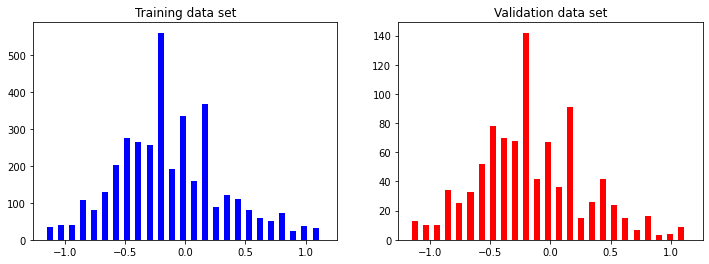

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=number_of_bins, width=0.05, color='blue')
axes[0].set_title('Training data set')
axes[1].hist(y_test, bins=number_of_bins, width=0.05, color='red')
axes[1].set_title('Validation data set')

Next steps are image processing for better model training. We can perform defferent image augmentation techniques:
1. Zooming the image,
2. Transforming the image,
3. Altering brightness of the image,
4. Flipping the image etc.

Zooming the image for better feature extraction

In [9]:
def zoomed(image):
  zoomed_image = iaa.Affine(scale=(1, 1.3)) # zoom augmentation presents in Affine function
  image = zoomed_image.augment_image(image)
  return image

Calling the zoomed image functions and plotting the data

Text(0.5, 1.0, 'Zoomed Image ')

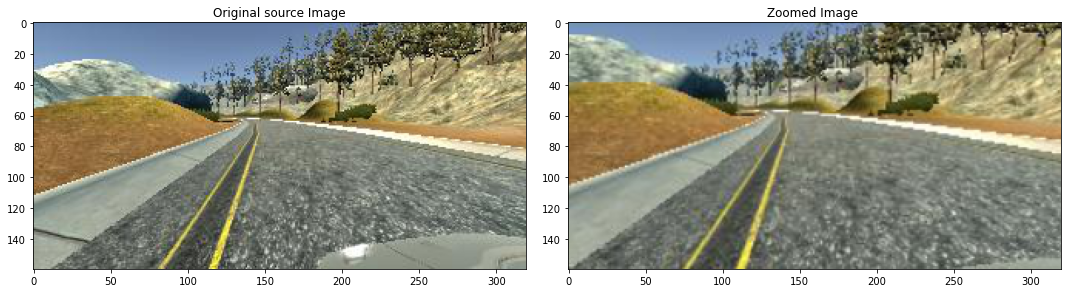

In [10]:
image = data_of_the_image_path[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoomed(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original source Image')
 
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image ')

Further transforming the images to create varieties of data for image augmentation and for creating more training data

Text(0.5, 1.0, 'Transformed Image')

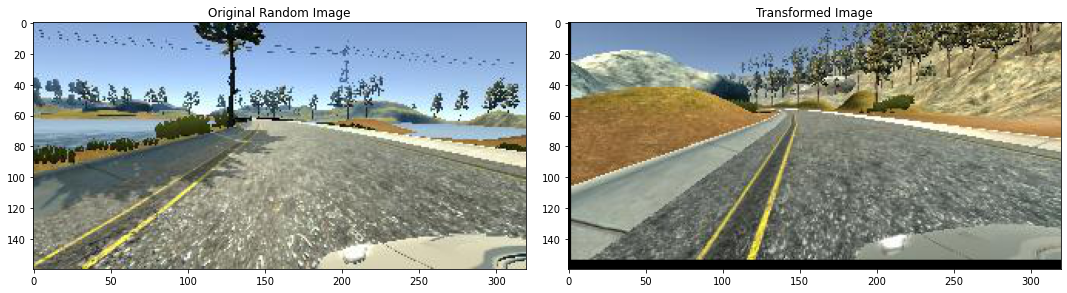

In [11]:
def transform(image):
  translated = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = translated.augment_image(image)
  return image
image = data_of_the_image_path[random.randint(0, 1000)]
original_random_image = mpimg.imread(image)
transformed_image = transform(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_random_image)
axs[0].set_title('Original Random Image')
 
axs[1].imshow(transformed_image)
axs[1].set_title('Transformed Image')

Now we will alter the brightness of an image

In [12]:
def modify_image_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2)) # calling multiply function from image augmentation library.
    image = brightness.augment_image(image)
    return image

Calling the brightness alterning function and displaying the details

Text(0.5, 1.0, 'Brightness altered image ')

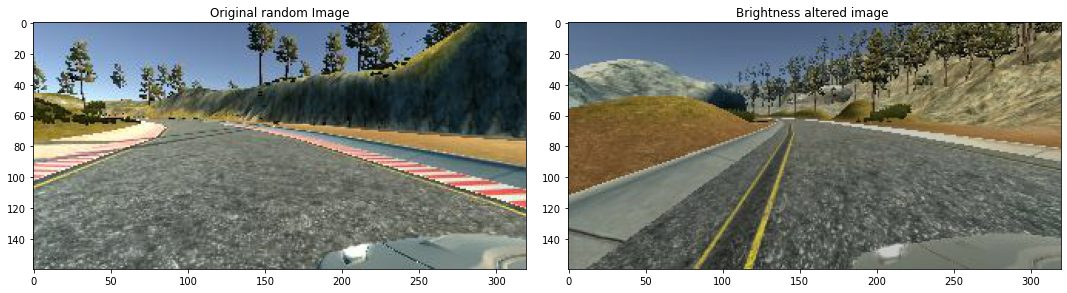

In [13]:
image = data_of_the_image_path[random.randint(0, 1000)]
original_random_image = mpimg.imread(image)
brightness_modified_image = modify_image_brightness(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_random_image)
axs[0].set_title('Original random Image')
 
axs[1].imshow(brightness_modified_image)
axs[1].set_title('Brightness altered image ')

Flipping the images to balance the dataset

In [14]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1) # calling flip function from cv2 library
    steering_angle = -steering_angle
    return image, steering_angle

Calling the function and visualzing the results

Text(0.5, 1.0, 'Flipped one -  with steering Angle:0.5284035')

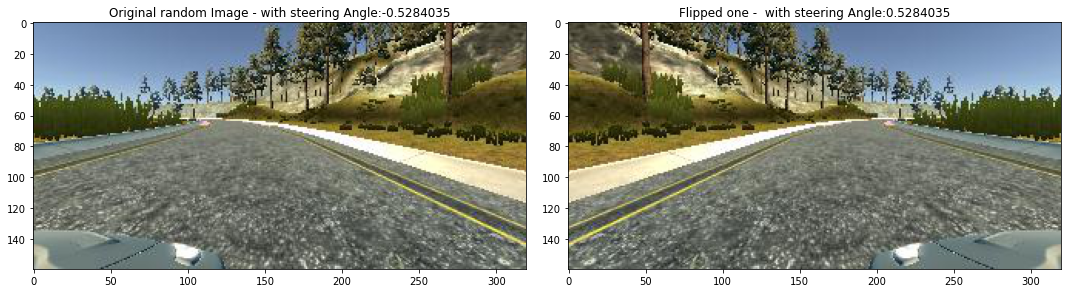

In [15]:
random_data_index = random.randint(0, 1000)
image = data_of_the_image_path[random_data_index]
str_angle = steering_angles[random_data_index]
 
original_data_image = mpimg.imread(image)
flipped_final_image, flip_angle = img_random_flip(original_data_image, str_angle)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_data_image)
axs[0].set_title('Original random Image - ' + 'with steering Angle:' + str(str_angle))
 
axs[1].imshow(flipped_final_image)
axs[1].set_title('Flipped one - ' + ' with steering Angle:' + str(flip_angle))

Creating the random image augmentation function to perform all the above image augmentation techniques

In [16]:
def random_image_augment(input_img, str_ang):
    input_img = mpimg.imread(input_img)
    if np.random.rand() < 0.5:
      input_img = transform(input_img)
    if np.random.rand() < 0.5:
      input_img = zoomed(input_img)
    if np.random.rand() < 0.5:
      input_img = modify_image_brightness(input_img)
    if np.random.rand() < 0.5:
      input_img, str_ang = img_random_flip(input_img, str_ang)
    
    return input_img, str_ang

Calling the random image function and plotting the results

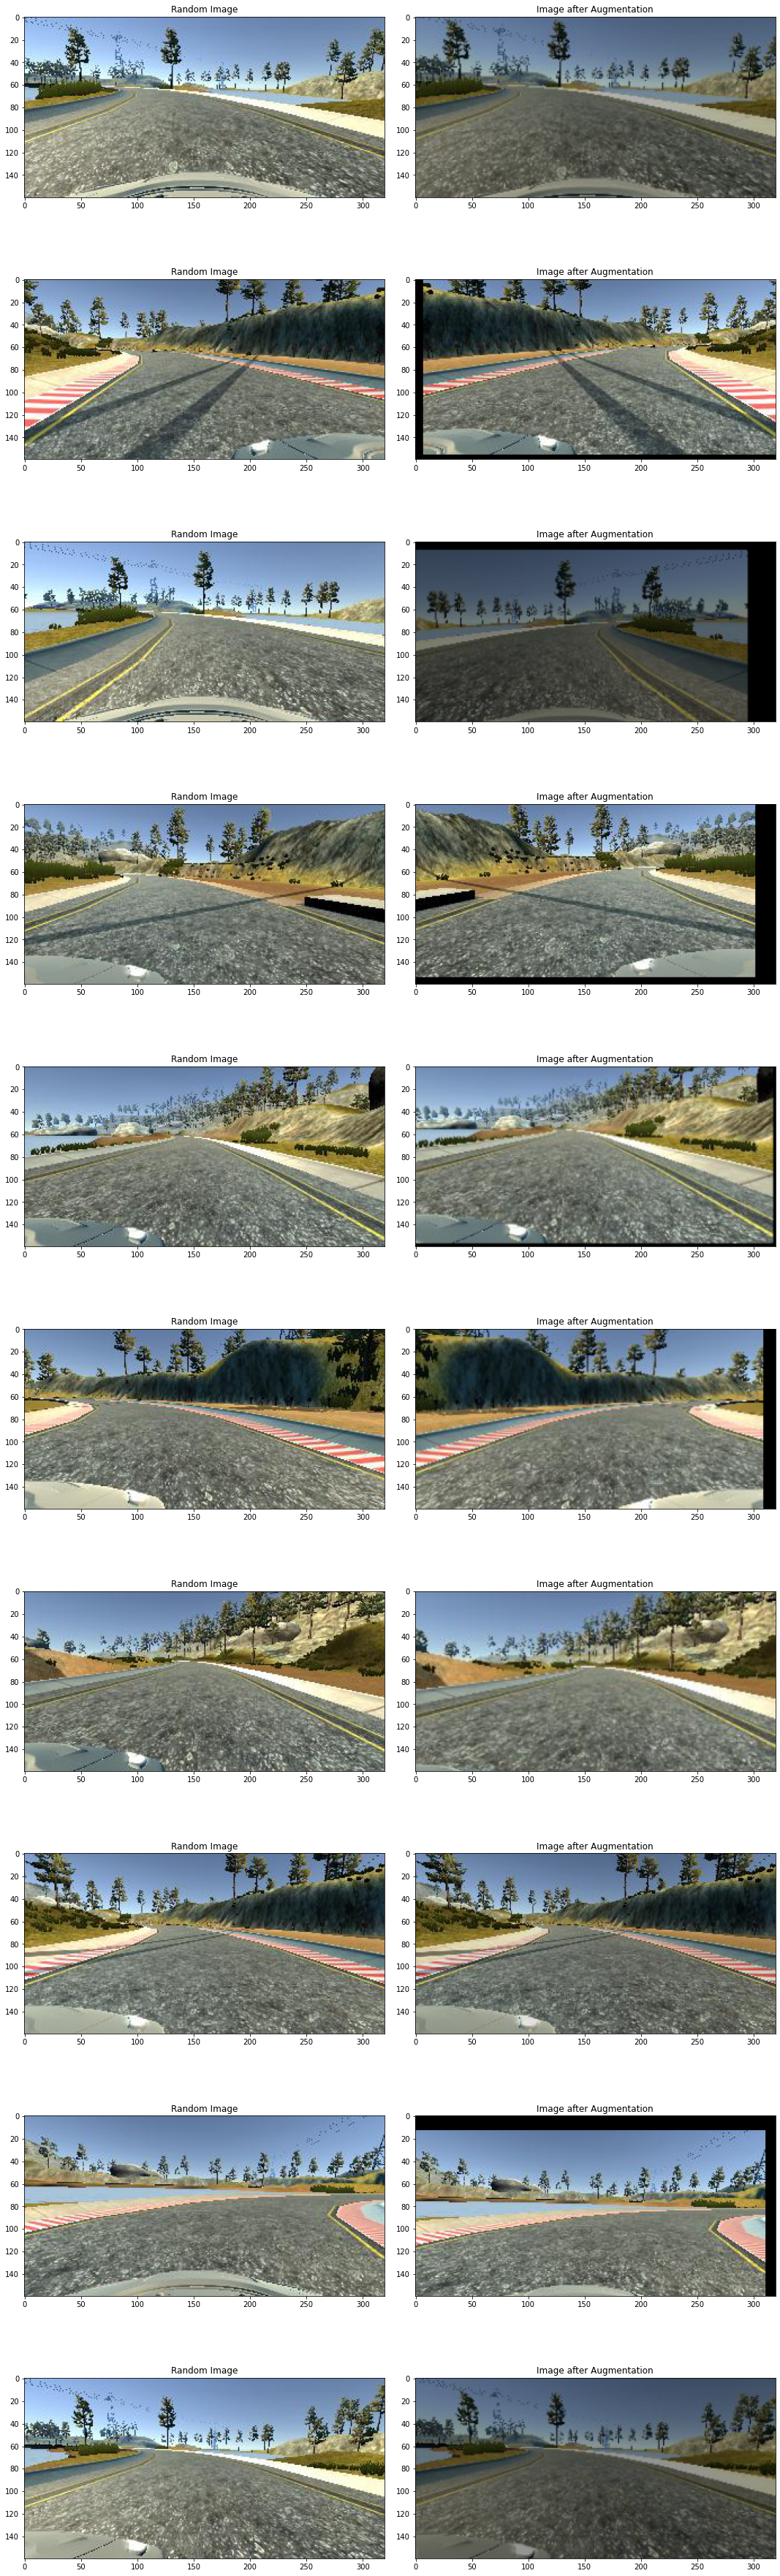

In [17]:
fig, axs = plt.subplots(10, 2, figsize=(15, 50))
fig.tight_layout()
 
for i in range(10):
  rand_num = random.randint(0, len(data_of_the_image_path) - 1)
  rand_image = data_of_the_image_path[rand_num]
  rand_steering = steering_angles[rand_num]
    
  original_random_image = mpimg.imread(rand_image)
  augmented_final_image, steering = random_image_augment(rand_image, rand_steering)
    
  axs[i][0].imshow(original_random_image)
  axs[i][0].set_title("Random Image")
  
  axs[i][1].imshow(augmented_final_image)
  axs[i][1].set_title("Image after Augmentation")

preprocess_image function for image pre processing 

In [18]:
def preprocess_image(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV) #As per our NVIDEA model, it recommends to use YVU images, this YUV images are very effective in training the model
    img = cv2.GaussianBlur(img,  (3, 3), 0) # helps in smoothening the data, (3,3) is size of the kernal and 0 means no deviation
    img = cv2.resize(img, (200, 66))  # to crop the uncessary image details that contails trees, 
                                      #and some other data. And also to match the image size used by the NVIDEA model arch.
    img = img/255 #image normalization  
    return img

Plotting the visuals after pre processing the images

Text(0.5, 1.0, 'Preprocessed data Image')

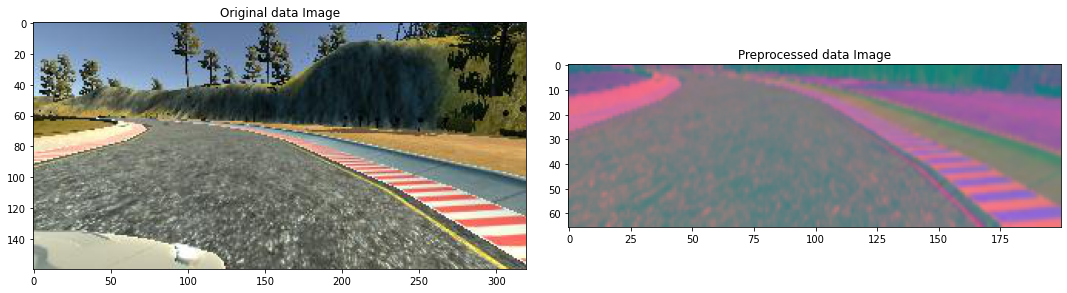

In [19]:
initial_image = data_of_the_image_path[20] #selecting some random image
original_read_image = mpimg.imread(initial_image) # read the image using default function imread from mping library.
preprocessed_image = preprocess_image(original_read_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_read_image)
axs[0].set_title('Original data Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed data Image')

Now the final step before sending the data to the model is batch generation. Image generator takes the input data and creates a defined number of augmented sample images along with lables, and turns these augmented images with respective labels. Its main benifit is, it creates augmented images dynamically rather than augmenting all the images at one time and storing them in valuable memory space. Generator allows us to create small batches of images at a time only when the generator is called. This is memory efficient approach(only use when it is required).

In [20]:
def batch_generator(data_of_the_image_path, str_angle, b_size, is_train):
  
  while True:
    b_img = []
    b_str = []
    
    for i in range(b_size):
      rand_indx = random.randint(0, len(data_of_the_image_path) - 1) #taking random image data
      
      if is_train: # if it is training mode, then we are generating augmented images
        img, strng_ang = random_image_augment(data_of_the_image_path[rand_indx], str_angle[rand_indx]) #Calling function to generate aug. data
     
      else:
        img = mpimg.imread(data_of_the_image_path[rand_indx]) #if it is not training mode, then go for validation, augmentation not needed
        strng_ang = str_angle[rand_indx] 
      
      img = preprocess_image(img) #pre processing the image
      b_img.append(img) # store newly augmented values in below arrays
      b_str.append(strng_ang)
    yield (np.asarray(b_img), np.asarray(b_str)) # yield to save the initialized values

Plotting the batch_generation function results

Text(0.5, 1.0, 'Testing Image')

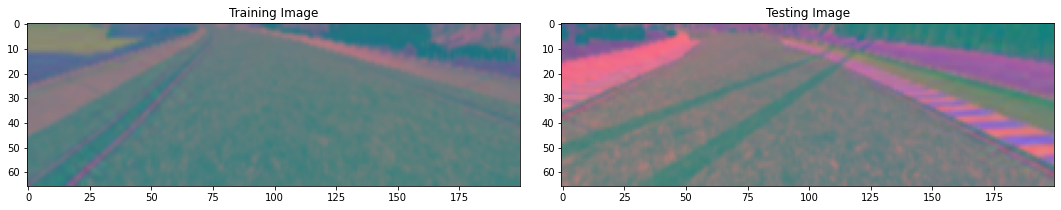

In [21]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1)) # next statement to request the next set of images from generator,     
                                                                # inside 1 means only 1 image as batch size, next one is for training mode
x_test_gen, y_test_gen = next(batch_generator(X_test, y_test, 1, 0))
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image') #training image has more augmented data
 
axs[1].imshow(x_test_gen[0])
axs[1].set_title('Testing Image')

Creating the NVIDEA model with CNN layers 

In [22]:
def self_Drive_model():
 
  model = Sequential() # instantiating sequential model
 
  model.add(Conv2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(66,200,3),activation='elu')) #24 filters with (5,5) kernal size, 
                                  #elu activation has non zero gradient value in negative region, so it helps in backpropogation.

  model.add(Conv2D(36, kernel_size=(5,5), strides=(2,2), activation='elu')) #added remaining layers as per NVIDEA model
  model.add(Conv2D(48, kernel_size=(5,5), strides=(2,2), activation='elu')) 
  model.add(Conv2D(64, kernel_size=(3,3), activation='elu')) # removed strides as our image dimesions got reduced
  model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
  #model.add(Dropout(0.5)) # dropout layers to prevent over fitting 
 
  model.add(Flatten())
  model.add(Dense(100, activation='elu')) 
  #model.add(Dropout(0.5)) # removing dropout layers to reduce validation and training losses
 
  model.add(Dense(50, activation='elu'))
  model.add(Dense(10, activation ='elu'))
  model.add(Dense(1))
 
  optimizer= Adam(lr=1e-3) #we are passing initial learning to improve the model 
  model.compile(loss='mse', optimizer=optimizer)
 
  return model

Creating model object and printing the summary

In [23]:
model = self_Drive_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 100)               1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


By using plot_model default library, we are plotting the flow chart

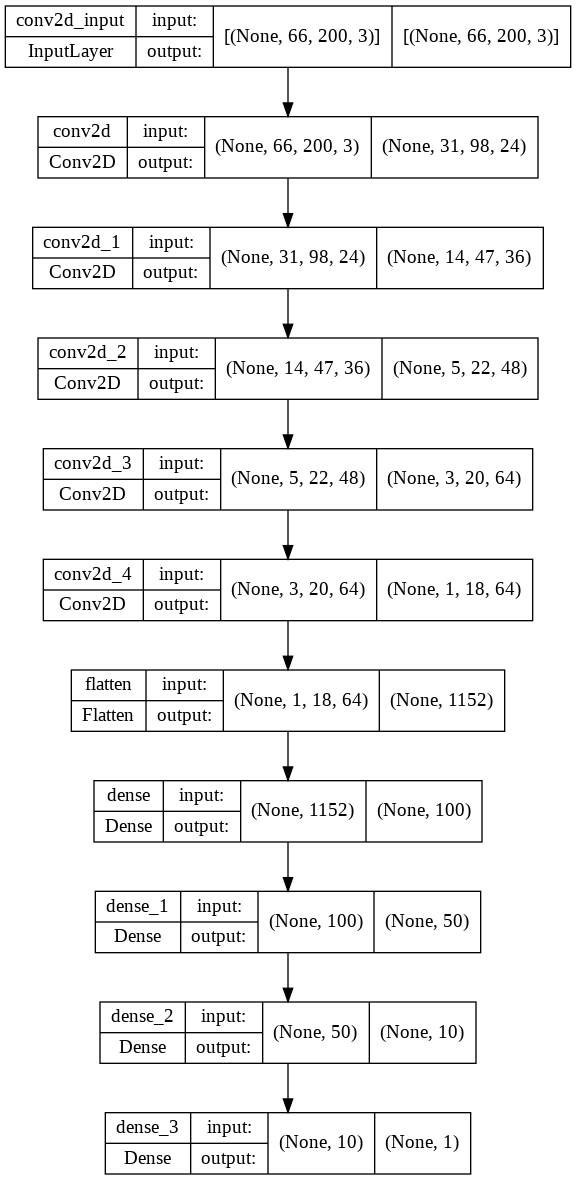

In [24]:
from tensorflow.keras.utils import plot_model

plot_model(model, './self driving car model.png', show_shapes = True)

Fitting the model by passing the necessary parameters, since we will be dealing with huge augmented dataset, we are calling batch_generator. 

In [25]:
history = model.fit(batch_generator(X_train, y_train, 100, 1),
                                  steps_per_epoch=300, 
                                  epochs=10,
                                  validation_data=batch_generator(X_test, y_test, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1) #input data created realtime by batch_generator

Epoch 1/10
300/300 [==============================] - 237s 754ms/step - loss: 0.2215 - val_loss: 0.1672
Epoch 2/10
300/300 [==============================] - 211s 704ms/step - loss: 0.1559 - val_loss: 0.1298
Epoch 3/10
300/300 [==============================] - 211s 705ms/step - loss: 0.1360 - val_loss: 0.1147
Epoch 4/10
300/300 [==============================] - 209s 698ms/step - loss: 0.1216 - val_loss: 0.1109
Epoch 5/10
300/300 [==============================] - 209s 698ms/step - loss: 0.1141 - val_loss: 0.1054
Epoch 6/10
300/300 [==============================] - 207s 691ms/step - loss: 0.1088 - val_loss: 0.1047
Epoch 7/10
300/300 [==============================] - 210s 703ms/step - loss: 0.1081 - val_loss: 0.1033
Epoch 8/10
300/300 [==============================] - 208s 697ms/step - loss: 0.1061 - val_loss: 0.1020
Epoch 9/10
300/300 [==============================] - 207s 693ms/step - loss: 0.1039 - val_loss: 0.0972
Epoch 10/10
300/300 [==============================] - 209s 699m

Plotting the loss graph to understand the model behaviour

Text(0.5, 0, 'Epoch')

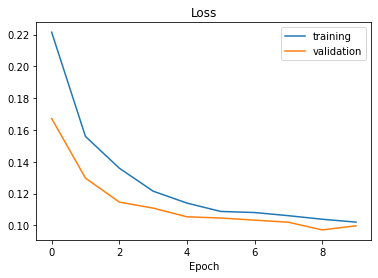

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

Model metrics

In [27]:
model.metrics_names


['loss']

Saving the model

In [28]:
model.save('selfDriveModel.h5')

Downloading the generated model file

In [29]:
from google.colab import files
files.download('selfDriveModel.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>